In [1]:
from model.model import *
from processing_pipeline import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [4]:
dfs = pd.concat([preprocess(alldat, i) for i in range(39)])

In [5]:
train, test = train_test_split(dfs)

In [6]:
train.shape

(7814, 21)

In [7]:
set(test["session"])

{1, 4, 8, 12, 19, 22, 25, 30, 35}

In [58]:
df = train

In [59]:
df_go = df[df['trial_type'] != "E"]

In [71]:
diff_100 = df_go[(df_go['pres_difficulty']) == 0]
df_go['pres_difficulty']

0      1.00
1      0.50
2      0.50
4      0.50
9      0.50
       ... 
338    0.75
339    0.75
340    0.75
341    0.75
342    0.75
Length: 5691, dtype: float64

In [72]:
# Split into Rewarded or Not Without Regard to Difficulty
reward = df_go['feedback_type'] == 1
nope = df_go['feedback_type'] == -1

dfrew = df_go[reward]
dfnone = df_go[nope]

# Split Difficulty and Feedback Types
diff_100 = df_go[(df_go['pres_difficulty']) == 1]
diff_100_rew = diff_100[(diff_100['feedback_type'] == 1)]
diff_100_nope =diff_100[(diff_100['feedback_type'] == -1)]
diff_75 = df_go[(df_go['pres_difficulty'])  == .75]
diff_75_rew = diff_75[(diff_75['feedback_type'] == 1)]
diff_75_nope =diff_75[(diff_75['feedback_type'] == -1)]
diff_50 = df_go[(df_go['pres_difficulty'])  == .50]
diff_50_rew = diff_50[(diff_50['feedback_type'] == 1)]
diff_50_nope =diff_50[(diff_50['feedback_type'] == -1)]
diff_25 = df_go[(df_go['pres_difficulty'])  == .25]
diff_25_rew = diff_25[(diff_25['feedback_type'] == 1)]
diff_25_nope =diff_25[(diff_25['feedback_type'] == -1)]
diff_0 = df_go[(df_go['pres_difficulty'])  == 0]
diff_0_rew = diff_0[(diff_0['feedback_type'] == 1)]
diff_0_nope =diff_0[(diff_0['feedback_type'] == -1)]

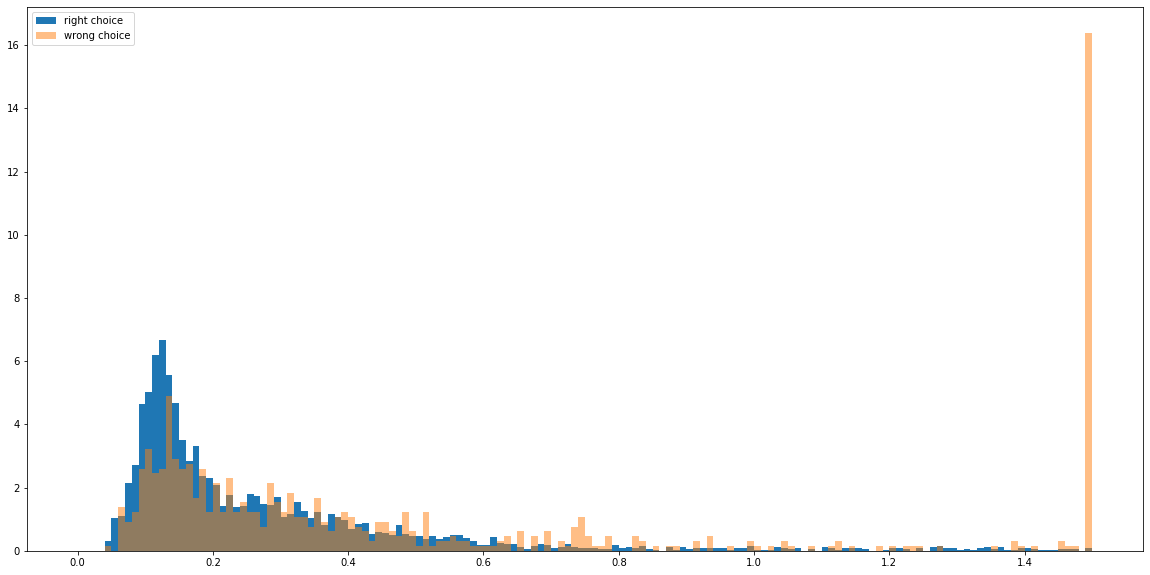

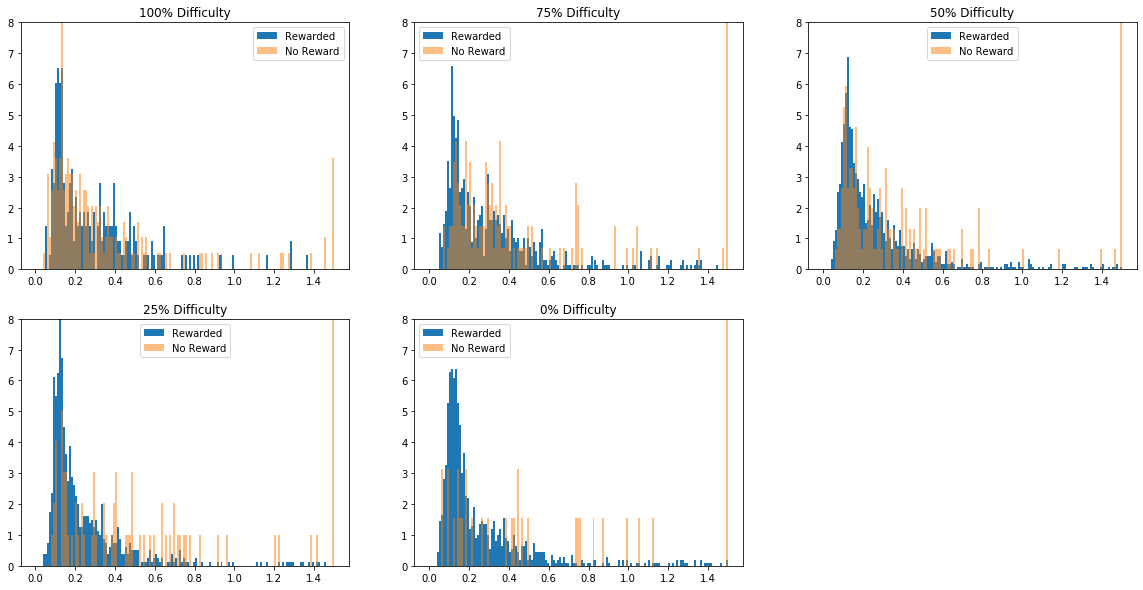

In [73]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(20,10))
plt.hist(dfrew['latency'], bins=150, label='right choice', range=[0, 1.5],density=True)
plt.hist(dfnone['latency'], bins=150, label='wrong choice', range=[0, 1.5],density=True,alpha=.5)
plt.legend()

plt.figure(1,figsize=(20,10))

plt.subplot(2, 3, 1)
plt.hist(diff_100_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_100_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('100% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 2)
plt.hist(diff_75_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_75_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('75% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 3)
plt.hist(diff_50_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_50_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('50% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 4)
plt.hist(diff_25_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_25_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('25% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 5)
plt.hist(diff_0_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_0_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('0% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.show()

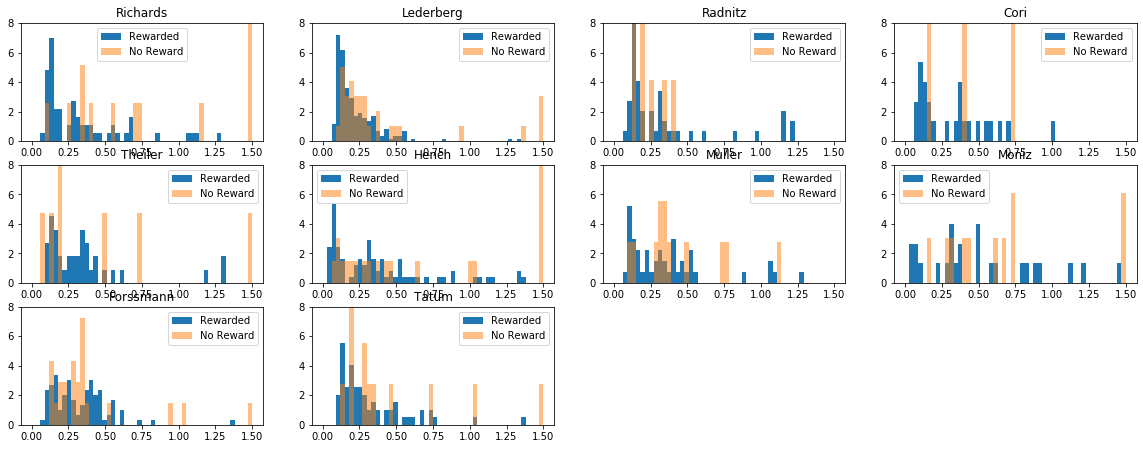

In [91]:
mouse_dict = set(diff_75['mouse_name'])

plt.figure(1,figsize=(20,10))
for idx, name in enumerate(mouse_array):
    # Get Current Mouse
    current_mouse = diff_75[diff_75['mouse_name'] == name]

    # Get Reward and No Reward Values
    dfrew = current_mouse[current_mouse['feedback_type'] == 1]
    dfnone = current_mouse[current_mouse['feedback_type'] == -1]
    
    # Plot
    plt.subplot(np.ceil(np.sqrt(len(mouse_dict))), np.ceil(np.sqrt(len(mouse_dict))), idx+1)
    plt.hist(dfrew['latency'], bins=50, label='Rewarded ', range=[0, 1.5],density=True)
    plt.hist(dfnone['latency'], bins=50, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
    plt.title(name)
    plt.legend()
    plt.ylim([0,8])
    

In [108]:
# Get Theiler, who has a bimodal response distribution on rewarded trials
theiler = (diff_75[diff_75['mouse_name'] == 'theiler'])

# Get Reward Values
dfrew = current_mouse[current_mouse['feedback_type'] == 1]

#### NOTE: ADD MODE COLUMN SO THAT SEABORN SPLITS THE COLORS AUTOMATICALLY
less_50 = current_mouse['latency'] <= .5
greater_25 = current_mouse['latency'] >= .25
mode1 = current_mouse[current_mouse['latency'] < .25]
mode2 = current_mouse[less_50 & greater_25]

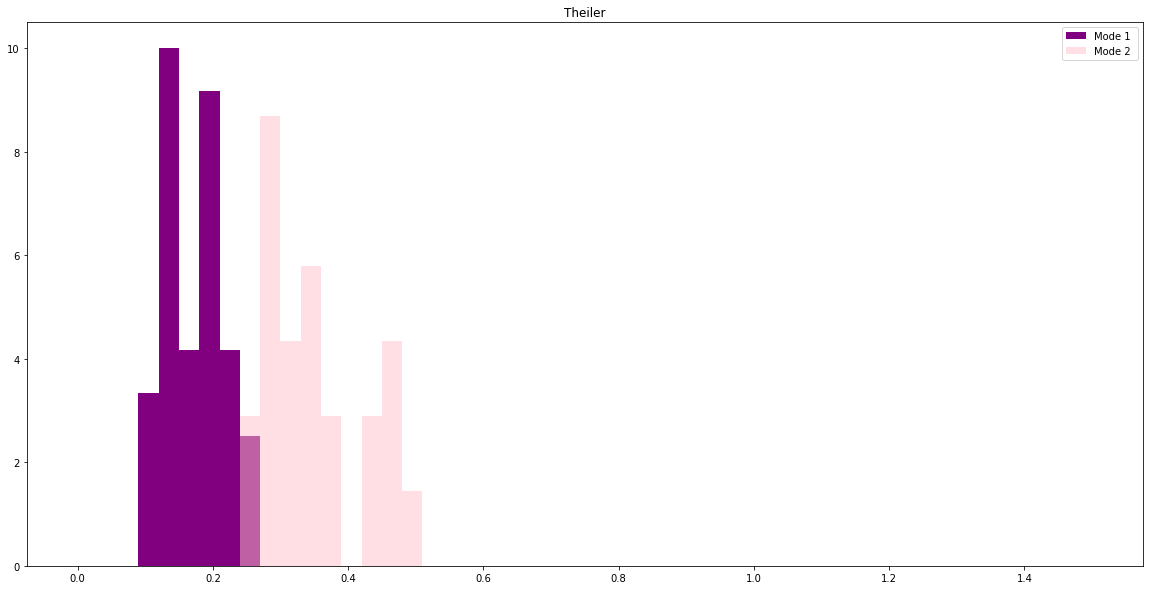

In [119]:
plt.figure(1,figsize=(20,10))
plt.hist(mode1['latency'], bins=50, label='Mode 1 ', range=[0, 1.5],density=True,color='purple')
plt.hist(mode2['latency'], bins=50, label='Mode 2', range=[0, 1.5],density=True,alpha=.5,color='pink')
plt.title('Theiler')
plt.legend()